# PCA & Clustering

### Problem Statement:- 

    - Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data.


### Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform Hierarchical clustering
from sklearn.cluster import KMeans

In [3]:
univ = pd.read_excel("University_Clustering.xlsx")
univ.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [4]:
#Checking missing values.
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
Univ        25 non-null object
State       25 non-null object
SAT         25 non-null int64
Top10       25 non-null int64
Accept      25 non-null int64
SFRatio     25 non-null int64
Expenses    25 non-null int64
GradRate    25 non-null int64
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [5]:
univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


### Data Visualization

<Figure size 1440x1440 with 0 Axes>

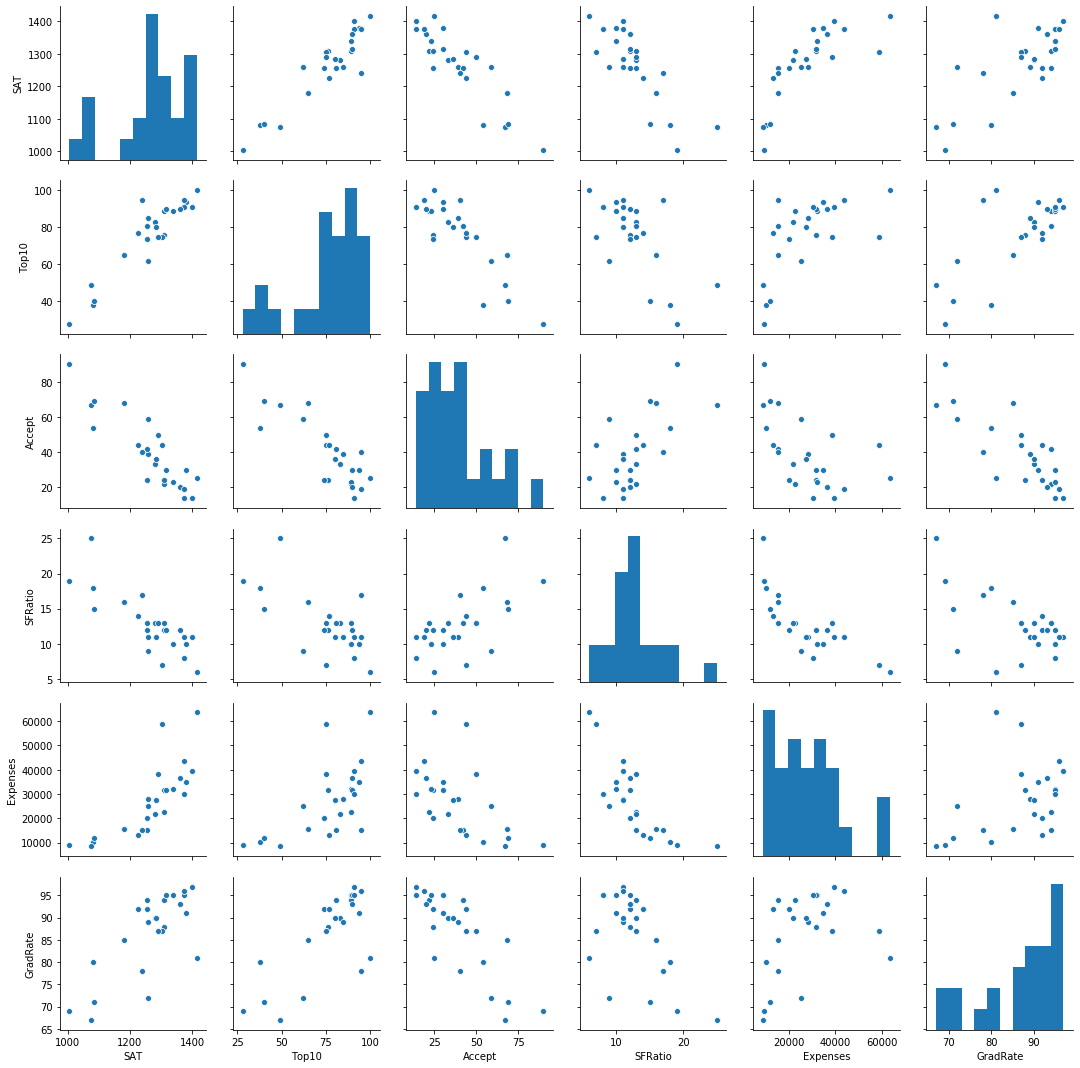

In [6]:
plt.figure(figsize=(20,20))
sns.pairplot(univ)
plt.show()

### Normalizing

To apply PCA and clustering, the data should be normalized.

In [7]:
# Removing first two columns since they are not numeric.
univ_num = univ.drop(['Univ','State'], axis = 1)

In [8]:
univ_num.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [9]:
from sklearn.preprocessing import scale
univ_scaled = scale(univ_num)

In [10]:
univ_scaled = pd.DataFrame(univ_scaled,columns=univ_num.columns)
univ_scaled.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [11]:
univ_scaled.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01
mean,-5.151435e-16,-2.176037e-16,-1.598721e-16,-2.109424e-16,0.000000,1.687539e-16
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621,1.020621e+00
min,-2.462455e+00,-2.546050e+00,-1.303758e+00,-1.686251e+00,-1.321971,-2.222029e+00
25%,-2.490335e-01,-1.302435e-01,-7.863939e-01,-4.315999e-01,-0.866597,-6.445235e-01
50%,1.748132e-01,2.373792e-01,-1.655566e-01,-1.806697e-01,0.011674,3.695869e-01
75%,6.928481e-01,7.100370e-01,5.587536e-01,3.211906e-01,0.529383,8.203026e-01
max,1.399259e+00,1.235212e+00,2.628211e+00,3.081422e+00,2.560381,1.158339e+00


### K Means Clustering W/O PCA

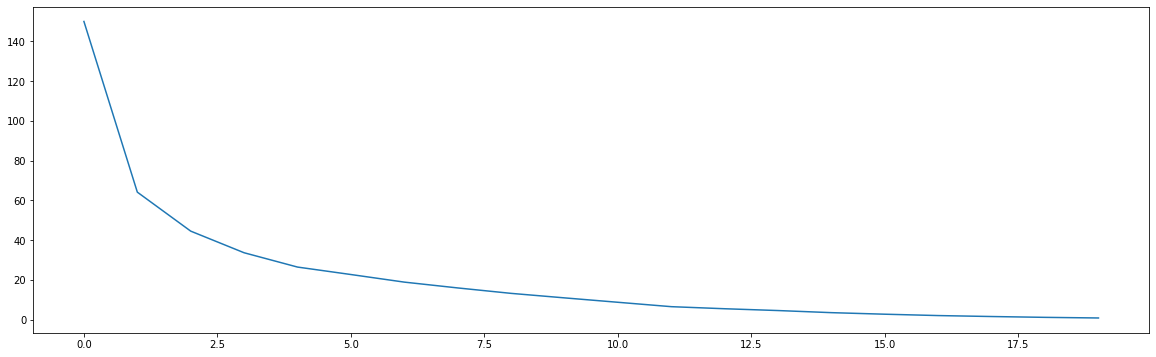

In [61]:
# sum of squared distances
plt.figure(figsize=(20,6))
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(univ_scaled)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

In [63]:
# Selecting 3 clusters from the above screen plot which is the optimum number of clusters 
model=KMeans(n_clusters=3) 
model.fit(univ_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

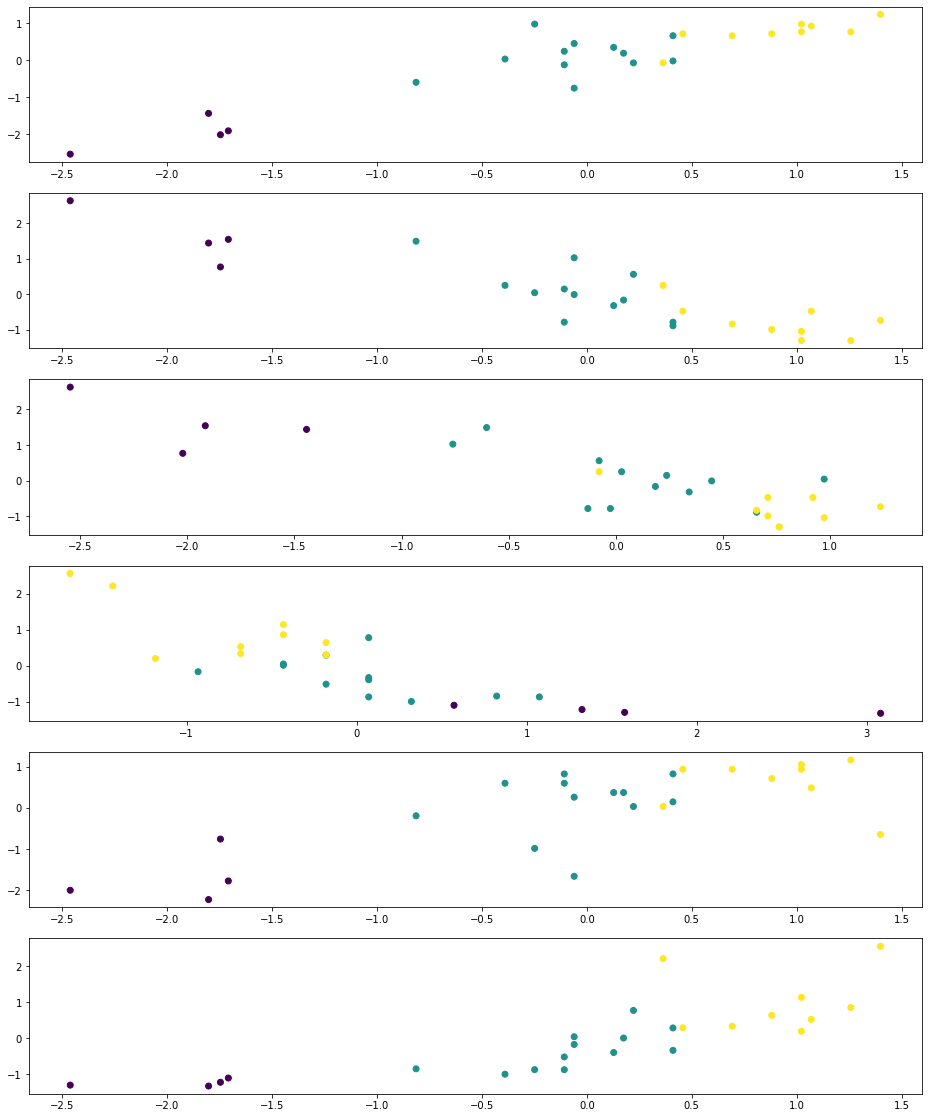

In [64]:
# Let's visualize few parameters
plt.figure(figsize = (16,20))
plt.subplot(6,1,1)
plt.scatter(univ_scaled['SAT'], univ_scaled['Top10'], c=model.labels_) 

plt.subplot(6,1,2)
plt.scatter(univ_scaled['SAT'], univ_scaled['Accept'], c=model.labels_) 

plt.subplot(6,1,3)
plt.scatter(univ_scaled['Top10'], univ_scaled['Accept'], c=model.labels_) 

plt.subplot(6,1,4)
plt.scatter(univ_scaled['SFRatio'], univ_scaled['Expenses'], c=model.labels_) 

plt.subplot(6,1,5)
plt.scatter(univ_scaled['SAT'], univ_scaled['GradRate'], c=model.labels_) 

plt.subplot(6,1,6)
plt.scatter(univ_scaled['SAT'], univ_scaled['Expenses'], c=model.labels_) 

plt.show()

### Applying PCA

In [12]:
pca = PCA(random_state=42)

In [13]:
pca.fit(univ_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [15]:
pca.explained_variance_ratio_

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

### Scree Plot to explain the variance

In [17]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

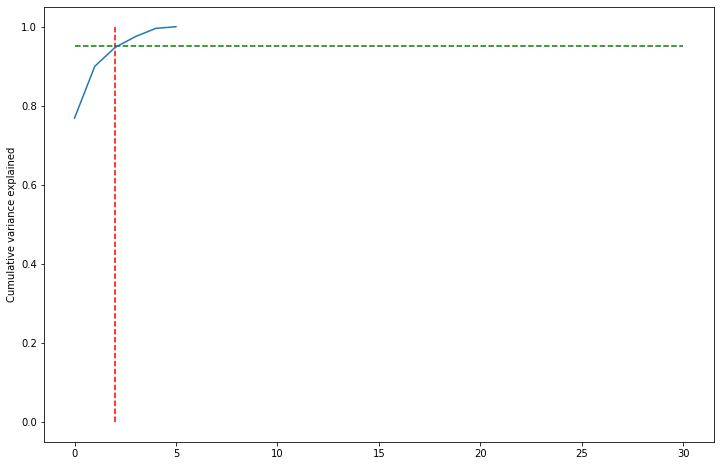

In [18]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=2, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [19]:
#Perform PCA with two varibales.
from sklearn.decomposition import IncrementalPCA

In [20]:
pca_final = IncrementalPCA(n_components=2)

In [21]:
univ_pca = pca_final.fit_transform(univ_scaled)

In [22]:
univ_pca.shape

(25, 2)

In [23]:
univ_pca = pd.DataFrame(data=univ_pca, columns=["PC1", "PC2"])
univ_pca.head()

,PC1,PC2
0,1.009874,-1.064310
1,2.822238,2.259045
2,-1.112466,1.631209
3,0.741741,-0.042187
4,0.311912,-0.635244


### K Means Clustering

### Hopkins Statistics:

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [24]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(univ_pca)

0.6496067254250518

Since Hopkins Statistic is above the threshold 0.5, data has a tendency to cluster.

### Elbow curve to find out the number of clusters

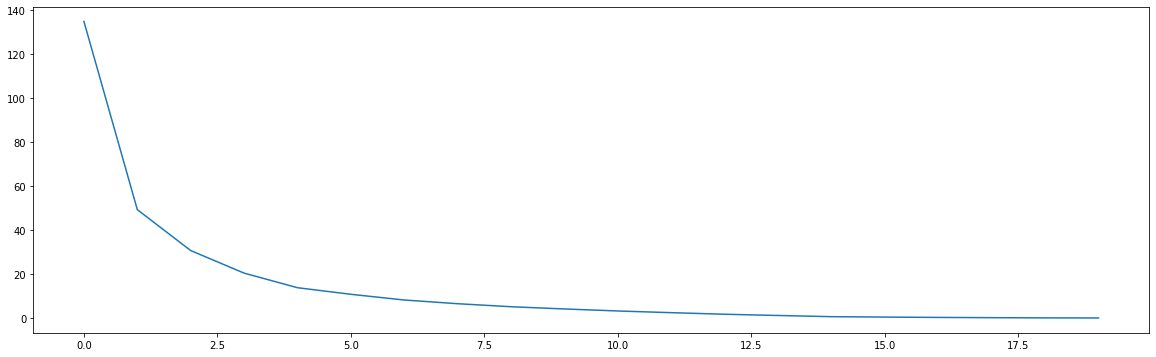

In [26]:
# sum of squared distances
plt.figure(figsize=(20,6))
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(univ_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

### Building the Model

In [27]:
# Selecting 3 clusters from the above screen plot which is the optimum number of clusters 
model=KMeans(n_clusters=3) 
model.fit(univ_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

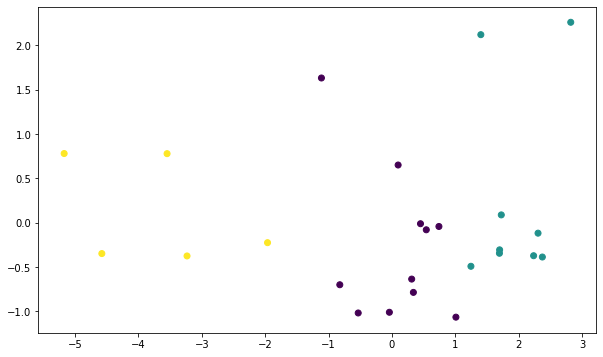

In [29]:
plt.figure(figsize = (10,6))
plt.scatter(univ_pca['PC1'], univ_pca['PC2'], c=model.labels_) 

plt.show()

In [41]:
cluster_labels=pd.Series(model.labels_)
univ["Cluster_ID"] = cluster_labels # creating a  new column and assigning it to new column 
univ.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_ID
0,Brown,RI,1310,89,22,13,22704,94,0
1,CalTech,CA,1415,100,25,6,63575,81,1
2,CMU,PA,1260,62,59,9,25026,72,0
3,Columbia,NY,1310,76,24,12,31510,88,0
4,Cornell,NY,1280,83,33,13,21864,90,0


In [42]:
# getting aggregate mean of each cluster
univ_ave = univ.groupby("Cluster_ID").mean().reset_index()

In [43]:
univ_ave.head()

,Cluster_ID,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,1270.000000,79.727273,37.545455,12.545455,23529.636364,87.818182
1,1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
2,2,1085.200000,44.000000,69.600000,18.600000,11056.400000,74.400000


In [44]:
# creating a csv file 
univ_ave.to_csv("university.csv",encoding="utf-8")

### Hierarchical Clustering


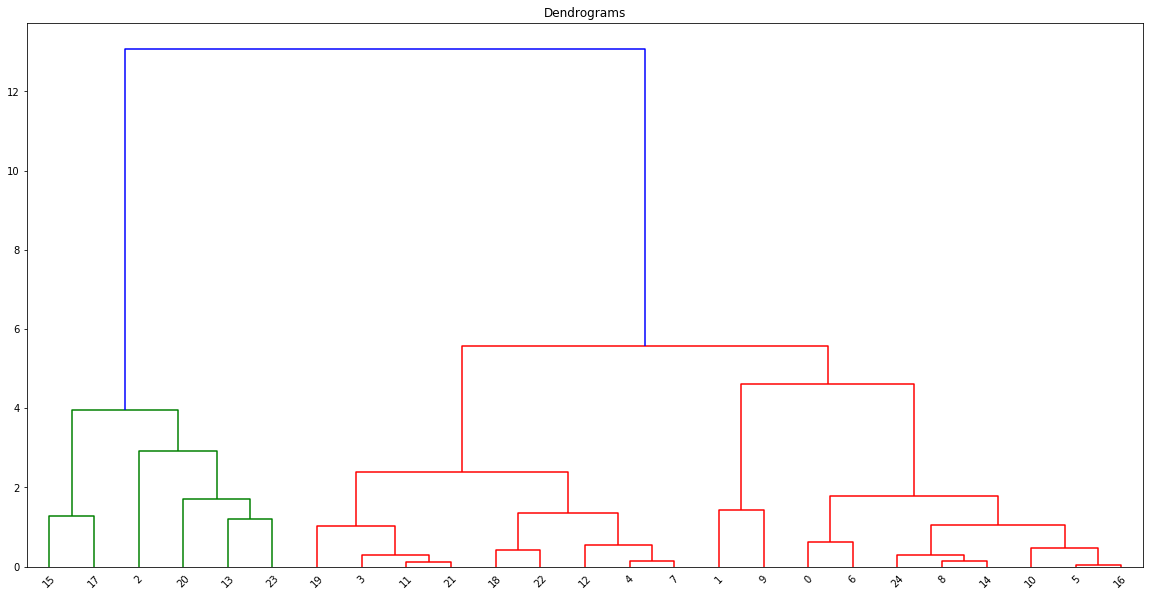

In [54]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(univ_pca, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 5 and cut the dendrogram:

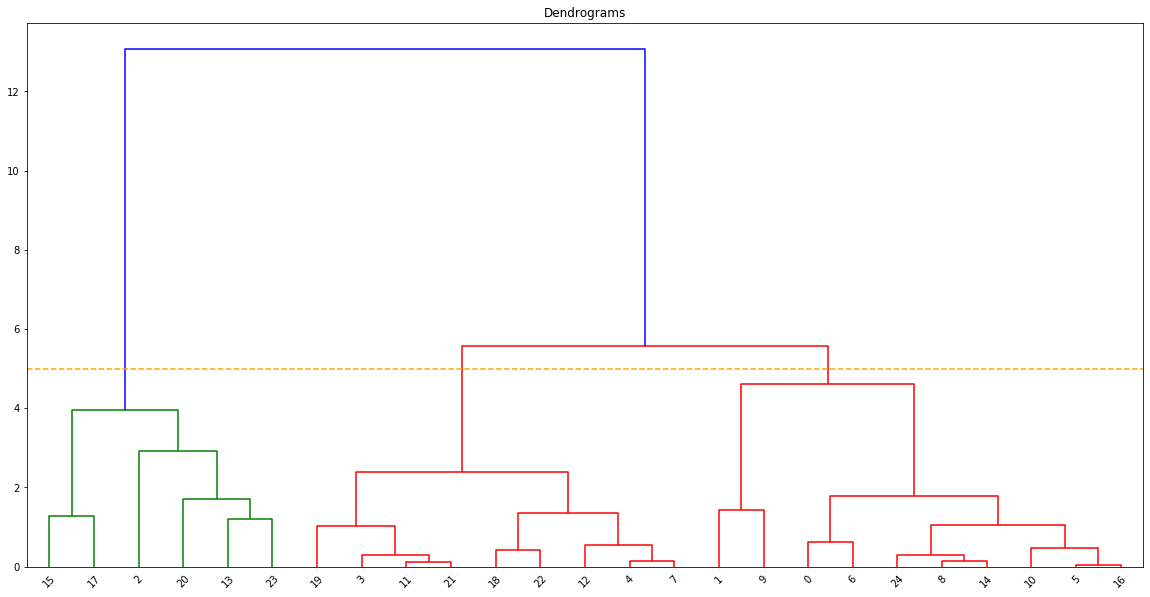

In [56]:
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(univ_pca, method='ward'))
plt.axhline(y=5, color='orange', linestyle='--')

In [57]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(univ_pca)

array([0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 0])

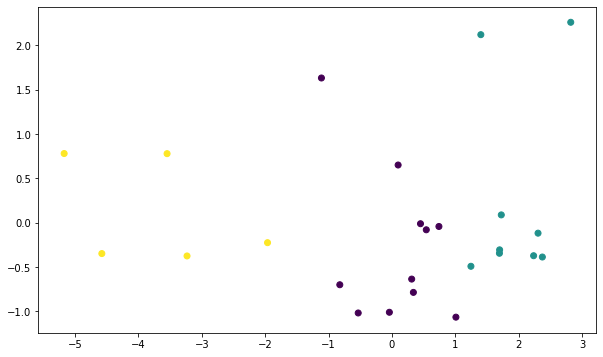

In [58]:
plt.figure(figsize = (10,6))
plt.scatter(univ_pca['PC1'], univ_pca['PC2'], c=model.labels_) 

plt.show()

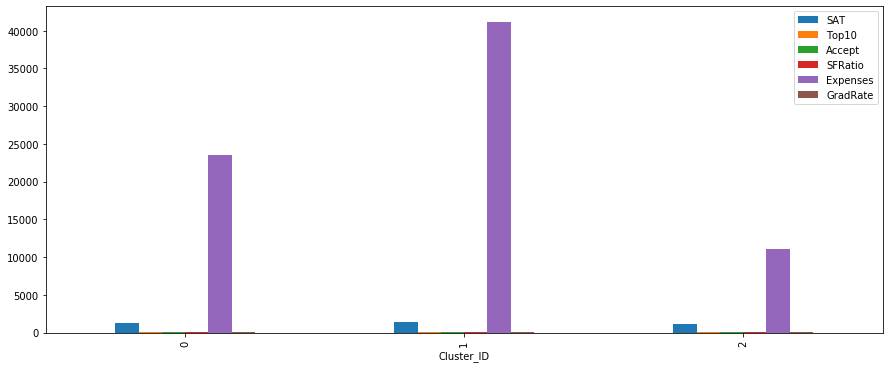

In [60]:
#plotting barplot for all 5 clusters

univ_ave.plot(x="Cluster_ID", y=["SAT","Top10","Accept","SFRatio","Expenses","GradRate"], kind="bar", figsize=(15,6))
plt.show()

### Conclusion:- 

    - Before PCA, the clusters are little overlapped
    - After PCA, we can see lear clusters